# EY Data Science Challenge 2019

## Preliminary Exploration
* Most hashes have multiple trajectories, recorded throughout the day
* Coordinates are represented in Cartesian Projection (can use `pyproj` to convert back to Lat Lon)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dtype = {
    "vmax" : np.float64,
    "vmin" : np.float64,
    "vmean" : np.float64,
    "x_entry" : np.float64,
    "y_entry" : np.float64,
    "x_exit" : np.float64,
    "y_exit" : np.float64
}

In [3]:
train = pd.read_csv("data/data_train.csv", dtype=dtype, index_col=0, nrows=100)

In [4]:
train.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
hash             100 non-null object
trajectory_id    100 non-null object
time_entry       100 non-null object
time_exit        100 non-null object
vmax             16 non-null float64
vmin             16 non-null float64
vmean            16 non-null float64
x_entry          100 non-null float64
y_entry          100 non-null float64
x_exit           100 non-null float64
y_exit           100 non-null float64
dtypes: float64(7), object(4)
memory usage: 9.4+ KB


## Check coordinates map to sensible LatLongs

They do seem sensible - all of the latlongs are in Atlanta.

In [6]:
from pyproj import Proj, transform

In [7]:
# define the CP -> LatLon converter
def xy_to_latlon(x, y):
    cp = Proj(init='epsg:3857')
    ll = Proj(init='epsg:4326')
    lat, lon = transform(cp, ll, x, y)
    return lat, lon

def x_to_lat(x):
    cp = Proj(init='epsg:3857')
    ll = Proj(init='epsg:4326')
    lat, _ = transform(cp, ll, x, 0)
    return lat
    
def y_to_long(y):
    cp = Proj(init='epsg:3857')
    ll = Proj(init='epsg:4326')
    _, long = transform(cp, ll, 0, y)
    return long

In [8]:
xy_to_latlon(train["x_entry"][0], train["y_entry"][0])

(33.695930000000004, -84.26334)

In [9]:
x_to_lat(train["x_entry"][0])

33.695930000000004

In [10]:
y_to_long(train["y_entry"][0])

-84.26334

## Check which coords lie within the city centre

In [21]:
center_lat_min = np.float64(3750901.5068)
center_lat_max = np.float64(3770901.5068)
center_lon_min = np.float64(-19268905.6133)
center_lon_max = np.float64(-19208905.6133)

In [25]:
xy_to_latlon(center_lat_min, center_lon_min)

(33.694921527853836, -84.41828535661946)

In [26]:
xy_to_latlon(center_lat_max, center_lon_max)

(33.874584584677734, -84.36561424964582)

In [29]:
def xy_in_center(x, y):
    center_lat_min = np.float64(3750901.5068)
    center_lat_max = np.float64(3770901.5068)
    center_lon_min = np.float64(-19268905.6133)
    center_lon_max = np.float64(-19208905.6133)
    return (center_lat_min <= x <= center_lat_max) and\
           (center_lon_min <= y <= center_lon_max)

In [33]:
train["entry_in_center"] = train.apply(lambda row: xy_in_center(row["x_entry"], row["y_entry"]), axis=1)
train["exit_in_center"] = train.apply(lambda row: xy_in_center(row["x_exit"], row["y_exit"]), axis=1)


In [38]:
train.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,entry_in_center,exit_in_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,2019-04-07 07:04:31,2019-04-07 07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,False,False
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,2019-04-07 07:20:34,2019-04-07 07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,False,False
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,2019-04-07 07:53:32,2019-04-07 08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,False,False
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,2019-04-07 08:17:50,2019-04-07 08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,False,False
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,2019-04-07 14:38:09,2019-04-07 14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,False,False


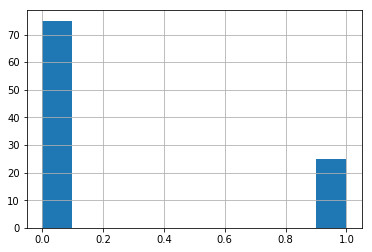

In [40]:
%matplotlib inline
train["exit_in_center"].hist()

In [41]:
train["exit_in_center"].value_counts()

False    75
True     25
Name: exit_in_center, dtype: int64

## Convert the time columns to pd.Timestamp

In [11]:
train['time_entry'] = pd.to_datetime(train['time_entry'])
train['time_exit'] = pd.to_datetime(train['time_exit'])

In [27]:
train["time_entry"][:10].dt.time

0    07:04:31
1    07:20:34
2    07:53:32
3    08:17:50
4    14:38:09
5    15:02:31
6    14:29:23
7    14:39:49
8    14:50:14
9    15:00:32
Name: time_entry, dtype: object

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
hash             100 non-null object
trajectory_id    100 non-null object
time_entry       100 non-null datetime64[ns]
time_exit        100 non-null datetime64[ns]
vmax             16 non-null float64
vmin             16 non-null float64
vmean            16 non-null float64
x_entry          100 non-null float64
y_entry          100 non-null float64
x_exit           100 non-null float64
y_exit           100 non-null float64
dtypes: datetime64[ns](2), float64(7), object(2)
memory usage: 14.4+ KB


## Looking at just the latest timestamp for each hash

In [44]:
latest = train.loc[train.groupby("hash").time_exit.idxmax()]

In [53]:
latest["exit_in_center"].value_counts()

False    16
True      3
Name: exit_in_center, dtype: int64